Airline Profit, using Monte Carlo Simulation

1. Random sample generation using the simulation model
    a. Get complete crude-oil data from Excel
    b. Estimate a, b, and sigma using linear regression
    c. Generate a random sample of 100,000 observations using the simulation model
    d. Add each observation to a new column in the data frame
2. Add a column to the data frame that includes the number of passengers per month.
3. Define cost function, that would include:
    a. cost of fuel
    b. Fixed cost for the airline.
    c. fixed cost per passenger.
    d. Add a column to the data frame, that includes the total cost.
4. Define revenue function, that would include:
    a. Revenue per passenger
    b. add a column to the data frame that includes total revenue.
5. Define profit function, that would include:
    a. Revenue minus cost. 
    b. add a column to the data frame that includes total profit.
6. plot a histogram of the profit.


Random Sample Generation

In [ ]:
#a. Get complete crude-oil data from Excel
##########################################

'''
File name: oil_price_OU_parametrs.py
Created by Zvika Afik on Sat Jun 22 11:12:23 2024
@author: AfikZv
Description: This file was used to develop Vasicek_functions.py and
provides examples for the use of the functions
'''
#Imports and General Settings    

import os
os.chdir("/Users/eranzwilling/Documents/Doctorate/HedgeOil/code/zvika/")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm 
from Vasicek_functions import * # special purpose function set
data_file = "real_prices.xlsx" #this file contains nominal and real prices of various oil products
excel_data = pd.read_excel(data_file, sheet_name=None, skiprows=39)
#----------------------------------------------------------------
##   use Cure Oil Monthly Real Prices
#   This part takes Excel data, imports into dataframe df for use. 
#   gererate new dataframe that will contain all the results
#----------------------------------------------------------------


sheet_name = 'Crude Oil-M'
column_month = 'Month'
column_name = 'Real'
df = excel_data[sheet_name]
df[column_month] = pd.to_datetime(df[column_month], format='%B %Y', errors='coerce')
df[column_month] = df[column_month].dt.strftime('%m-%Y')
df = df.dropna(subset=[column_month])
df_crude_m = df[[column_month, column_name]].dropna(subset=[column_name])
print(df.head())
#print(df_crude_m['Real'].head())
array = df_crude_m[[column_name]].to_numpy()
'simulation parameters'
num_steps = 605  # Number of steps (this is the number of months)
T = num_steps/12     # Time horizon, means number of years
num_paths = 10000   # Number of paths

#the below are the imported real prices of Crude Oil per month

     Month  Index (1982-84=1)  Nominal       Real Unnamed: 4
0  01-1974              0.468     9.59  64.298675        NaN
1  02-1974              0.473    12.45  82.591905        NaN
2  03-1974              0.478    12.73  83.566032        NaN
3  04-1974              0.481    12.72  82.979594        NaN
4  05-1974              0.486    13.02  84.062826        NaN


In [ ]:
#b. Estimate a, b, and sigma using linear regression
####################################################

print("Shape of the array:", array.shape)
df["Real"] = pd.to_numeric(df["Real"], errors='coerce')

# Drop rows with NaN values that resulted from coercion
df = df.dropna(subset=["Real"])

# Now df is cleaned and you can pass the "Real" column to Vasicek_LS
LS_Estimate = Vasicek_LS(df[["Real"]].to_numpy(), 1/12)
print("a_est: " + str(np.round(LS_Estimate[0],3)))
print("b_est: " + str(np.round(LS_Estimate[1],3)))
print("sigma_est: " + str(np.round(LS_Estimate[2],3)))


p0 = df["Real"].iloc[0]  # Initial price
a = LS_Estimate[0]
b = LS_Estimate[1]
sigma = LS_Estimate[2]
time_axis = np.linspace(0, T, num_steps + 1)
print("Sigma_est:", sigma )
print("a:" ,a )
print("b:" ,b )
print("p0:", p0 )
print("T: ", T)
print("num_paths:", num_paths)

#comment
#the printes are the simulation input parameters

Shape of the array: (624, 1)
a_est: 0.16
b_est: 73.819
sigma_est: 18.596
Sigma_est: 18.595876867221207
a: 0.15981646884189393
b: 73.81929426949603
p0: 64.29867544871794
T:  50.416666666666664
num_paths: 10000


/var/folders/s3/2bcdqqh11qz6jv6hrp4t56m00000gn/T/ipykernel_4282/1153150258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Real"] = pd.to_numeric(df["Real"], errors='coerce')


In [ ]:
# c. Generate a random sample of 100,000 observations using the simulation model
################################################################################

import matplotlib.dates as mdates 
#Define how many results to present on the chart (choose one of the 2 below)
presented_results_number = 15 
#presented_results_number = num_paths


# Simulate Vasicek model using exact discretization
simulated_prices_exact = vasicek_ZA(p0, a, b, sigma, T, num_steps, num_paths)


In [ ]:
print(simulated_prices_exact[0:])

[[ 64.29867545  64.29867545  64.29867545 ...  64.29867545  64.29867545
   64.29867545]
 [ 72.1578226   60.64631953  68.75203709 ...  52.04283727  59.34070016
   63.91873757]
 [ 78.66674663  60.110785    66.59024705 ...  46.98242946  62.31925039
   64.23681786]
 ...
 [ 72.86930006  79.35945202  36.06267353 ...  38.4982924   96.70171844
   63.08635509]
 [ 75.5161333   77.13596141  38.37356568 ...  34.27695201 104.26940209
   58.57830825]
 [ 82.01272127  70.9615777   33.55962516 ...  37.10146701 100.13348453
   59.76266066]]


/var/folders/s3/2bcdqqh11qz6jv6hrp4t56m00000gn/T/ipykernel_4282/922061252.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['Month']).dt.year


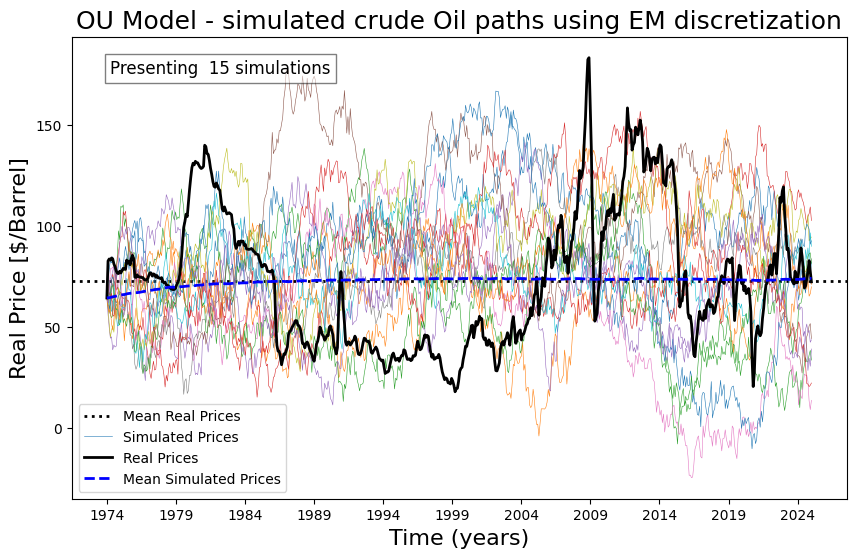

In [ ]:
#Present the results in a chart

#Add a year column for each step (to present it by years)
df['Year'] = pd.to_datetime(df['Month']).dt.year
# Generate time_axis (for the output)
time_axis = np.linspace(0, T, num_steps + 1)
# Plotting multiple paths with time on x-axis
plt.figure(figsize=(10, 6))
plt.title('OU Model - simulated crude Oil paths using EM discretization', fontsize=18)
plt.xlabel('Time (years)', fontsize=16)
plt.ylabel('Real Price [$/Barrel]', fontsize=16)
real_prices = df[column_name].to_numpy()
# Calculate and plot the mean of the simulated prices
mean_simulated_prices = np.mean(simulated_prices_exact, axis=1)
# Calculate and plot the mean of the real prices
mean_real_prices = np.mean(real_prices[:len(time_axis)])
plt.axhline(mean_real_prices, color='black', linestyle=':', linewidth=2, label='Mean Real Prices')

for i in range(presented_results_number):

    plt.plot(time_axis, simulated_prices_exact[:, i],linewidth=0.4, label='Simulated Prices' if i == 0 else "")

plt.plot(time_axis, real_prices[:len(time_axis)], '-k', linewidth=2, label='Real Prices')

# Extract the unique years and their corresponding indices for ticks
unique_years = df['Year'].unique()
year_ticks = np.linspace(0, T, len(unique_years))

# Select every 5h year for the ticks
selected_years = unique_years[::5]
selected_year_ticks = year_ticks[::5]

# Set the x-ticks and labels
plt.xticks(selected_year_ticks, selected_years)


# add mean simulated prices
plt.plot(time_axis, mean_simulated_prices, color='blue', linestyle='--', linewidth=2, label='Mean Simulated Prices')

# Adding a legend with proxy artist
#plt.legend([proxy_artist, plt.Line2D([0], [0], color='k', lw=4)], ['Simulated Prices', 'Real Prices'], loc='best')

# Adding a legend
plt.legend(loc='best')
# Adding the custom label
plt.text(0.05, 0.95, f'Presenting  {presented_results_number} simulations', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()



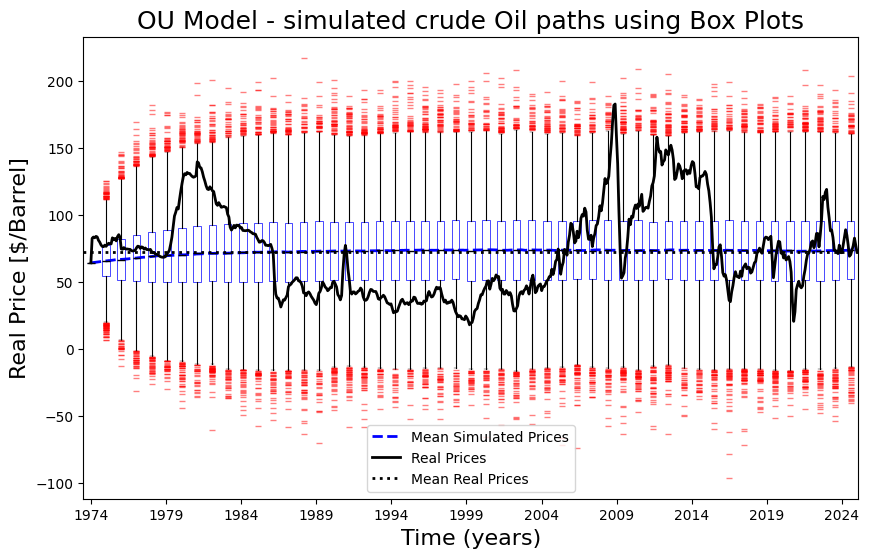

In [ ]:
#Present the results in Box Plot

T = num_steps/12
time_axis = np.linspace(0, T, num_steps + 1)

# Calculate the percentiles of the simulated prices
percentiles_25 = np.percentile(simulated_prices_exact, 25, axis=1)
percentiles_75 = np.percentile(simulated_prices_exact, 75, axis=1)
mean_simulated_prices = np.mean(simulated_prices_exact, axis=1)

# Calculate the mean of the real prices
real_prices = df[column_name].to_numpy()  
mean_real_prices = np.mean(real_prices[:len(time_axis)])
# Single color for the box plots
box_color = 'lightblue'

# Plotting the results using box plots at larger intervals
plt.figure(figsize=(10, 6))
plt.title('OU Model - simulated crude Oil paths using Box Plots', fontsize=18)
plt.xlabel('Time (years)', fontsize=16)
plt.ylabel('Real Price [$/Barrel]', fontsize=16)

# Plotting the box plots for the 25th and 75th percentiles at larger intervals
interval = 12  # Change interval as needed (e.g., 12 for every year, 24 for every 2 years)

for i in range(0, len(time_axis), interval):
    plt.boxplot(simulated_prices_exact[i, :], positions=[time_axis[i]], widths=0.5, patch_artist=True,
                boxprops=dict(facecolor='None', color='Blue', linewidth=0.5),
                medianprops=dict(color='black'),
                 whiskerprops=dict(linewidth=0.8, color='black'),
                capprops=dict(linewidth=0.3),
                flierprops=dict(marker='_', alpha=0.5, markerfacecolor='purple', markeredgecolor='red', markersize=5, linewidth=1))

# Plotting the mean simulated prices
plt.plot(time_axis, mean_simulated_prices, color='blue', linestyle='--', linewidth=2, label='Mean Simulated Prices')

# Plotting the real prices and their mean
plt.plot(time_axis, real_prices[:len(time_axis)], '-k', linewidth=2, label='Real Prices')
plt.axhline(mean_real_prices, color='black', linestyle=':', linewidth=2, label='Mean Real Prices')

# Extract the unique years and their corresponding indices for ticks
unique_years = df['Year'].unique()
year_ticks = np.linspace(0, T, len(unique_years))

# Select every 5th year for the ticks
selected_years = unique_years[::5]
selected_year_ticks = year_ticks[::5]

# Set the x-ticks and labels
plt.xticks(selected_year_ticks, selected_years)

# Adding a legend
plt.legend(loc='best')
plt.show()

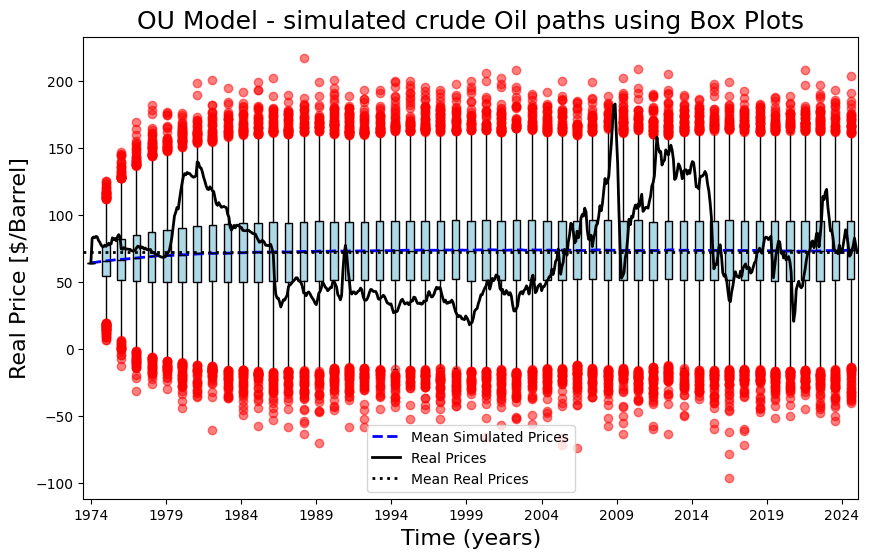

In [ ]:
#Another box-plot presentation option
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df and simulated_prices_exact are already defined and imported

# Generate time_axis
num_steps = 605  # Number of steps (this is the number of months)
T = num_steps / 12
time_axis = np.linspace(0, T, num_steps + 1)

# Calculate the percentiles of the simulated prices
percentiles_25 = np.percentile(simulated_prices_exact, 25, axis=1)
percentiles_75 = np.percentile(simulated_prices_exact, 75, axis=1)
mean_simulated_prices = np.mean(simulated_prices_exact, axis=1)

# Calculate the mean of the real prices
real_prices = df[column_name].to_numpy()
mean_real_prices = np.mean(real_prices[:len(time_axis)])

# Single color for the box plots
box_color = 'lightblue'

# Plotting the results using box plots at larger intervals
plt.figure(figsize=(10, 6))
plt.title('OU Model - simulated crude Oil paths using Box Plots', fontsize=18)
plt.xlabel('Time (years)', fontsize=16)
plt.ylabel('Real Price [$/Barrel]', fontsize=16)

# Plotting the box plots for the 25th and 75th percentiles at larger intervals
interval = 12  # Change interval as needed (e.g., 12 for every year, 24 for every 2 years)
for i in range(0, len(time_axis), interval):
    plt.boxplot(simulated_prices_exact[i, :], positions=[time_axis[i]], widths=0.5, patch_artist=True,
                boxprops=dict(facecolor=box_color, color='black'),
                medianprops=dict(color='black'), 
                flierprops=dict(marker='o', color='red', alpha=0.5, markerfacecolor='red', markeredgecolor='red'))

# Plotting the mean simulated prices
plt.plot(time_axis, mean_simulated_prices, color='blue', linestyle='--', linewidth=2, label='Mean Simulated Prices')

# Plotting the real prices and their mean
plt.plot(time_axis, real_prices[:len(time_axis)], '-k', linewidth=2, label='Real Prices')
plt.axhline(mean_real_prices, color='black', linestyle=':', linewidth=2, label='Mean Real Prices')

# Extract the unique years and their corresponding indices for ticks
unique_years = df['Year'].unique()
year_ticks = np.linspace(0, T, len(unique_years))

# Select every 5th year for the ticks
selected_years = unique_years[::5]
selected_year_ticks = year_ticks[::5]

# Set the x-ticks and labels
plt.xticks(selected_year_ticks, selected_years)

# Adding a legend
plt.legend(loc='best')
plt.show()


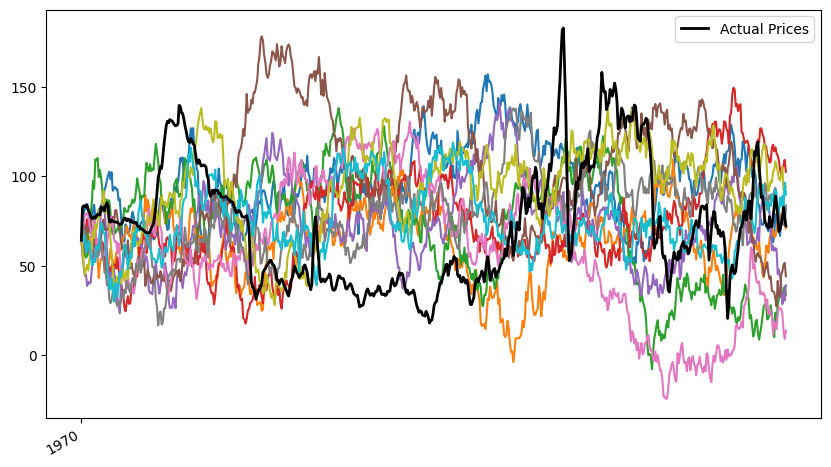

In [ ]:
# Part 1: Plotting 10 random paths
plt.figure(figsize=(10, 6))
df_crude_m['Month'] = pd.to_datetime(df["Month"], format='%m-%Y')
# Extract real prices and dates
real_prices = df_crude_m["Real"].to_numpy()
real_dates = df_crude_m["Month"].to_numpy()
#time_axis = real_dates[:num_steps + 1]
# Extract real prices and dates
real_prices = df[column_name].to_numpy()
real_dates = df["Month"].to_numpy()
time_axis = real_dates[:num_steps + 1]
# Plot 10 random paths
for i in range(10):
    plt.plot(time_axis, simulated_prices_exact[:, i])

# Plot the actual real prices against the dates
plt.plot(time_axis, real_prices[:len(time_axis)], '-k', linewidth=2, label='Actual Prices')

# Customize the x-axis to show dates less frequently
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Every 2 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Auto-format date labels for better readability
plt.gcf().autofmt_xdate()

# Add legend
plt.legend()
plt.show()

Length of real_prices: 606
Shape of simulated_prices_exact: (606, 10000)


,Month,Index (1982-84=1),Nominal,Real,Unnamed: 4,Year,Real Fuel Costs ($),Total Costs ($),Total Revenue ($),Profit ($),...,Mean Simulated Fuel Cost ($),Total Cost (Simulated) ($),Profit (Simulated) ($),Fuel Cost per Liter (Real) ($/liter),Total Cost (Real) ($),Profit (Real) ($),Revenue (Simulated) ($),Revenue (Real) ($),Fuel Cost Percentage (Simulated) (%),Fuel Cost Percentage (Real) (%)
0,01-1974,0.468,9.59,64.298675,NaN,1974,505492.731515,1.709976e+06,2.727464e+06,1.017488e+06,...,758239.097273,808239.097273,301647.819455,0.404394,406619.548636,-156619.548636,1.109887e+06,250000,99.344897,99.344897
1,02-1974,0.473,12.45,82.591905,NaN,1974,649307.428996,2.189358e+06,3.446537e+06,1.257179e+06,...,759264.327424,809264.327424,301852.865485,0.519446,514480.571747,-264480.571747,1.111117e+06,250000,99.341233,99.489254
2,03-1974,0.478,12.73,83.566032,NaN,1974,656965.658305,2.214886e+06,3.484828e+06,1.269943e+06,...,759588.858908,809588.858908,301917.771782,0.525573,520224.243729,-270224.243729,1.111507e+06,250000,99.336986,99.495178
3,04-1974,0.481,12.72,82.979594,NaN,1974,652355.301455,2.199518e+06,3.461777e+06,1.262259e+06,...,761447.894208,811447.894208,302289.578842,0.521884,516766.476091,-266766.476091,1.113737e+06,250000,99.334045,99.491629
4,05-1974,0.486,13.02,84.062826,NaN,1974,660871.275914,2.227904e+06,3.504356e+06,1.276452e+06,...,763312.494283,813312.494283,302662.498857,0.528697,523153.456936,-273153.456936,1.115975e+06,250000,99.331272,99.498147


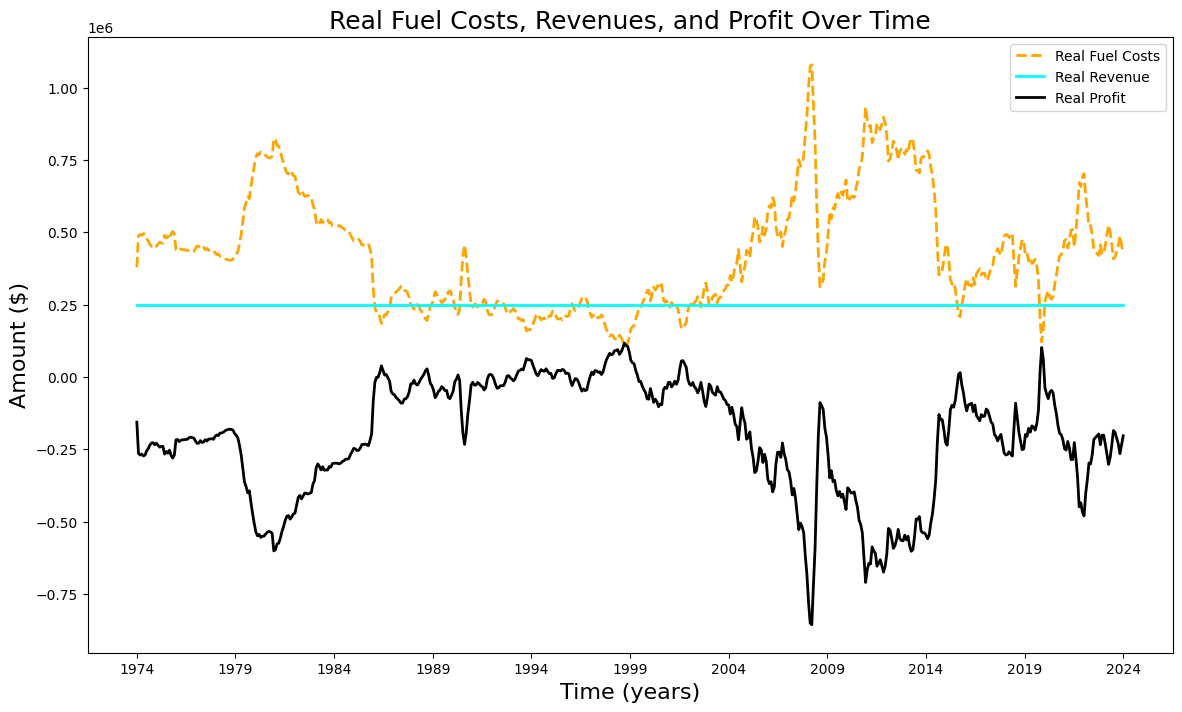

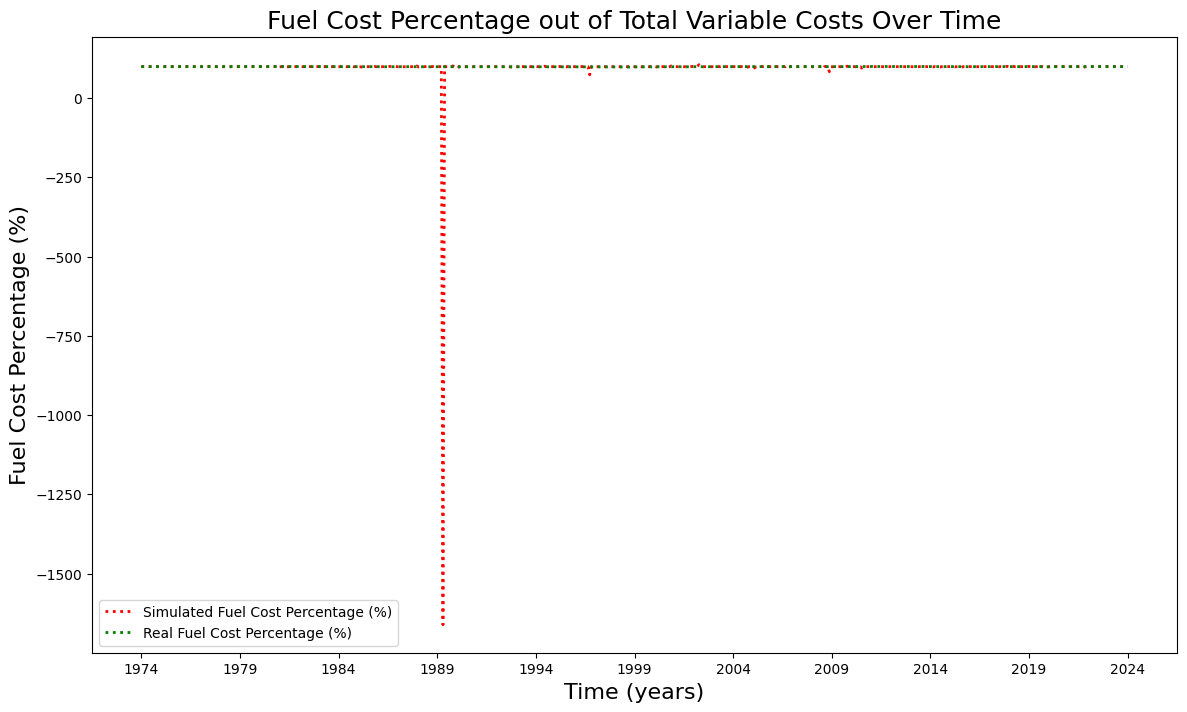

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df and the real prices are already defined and imported
column_name = 'Real'  # Correct column name containing real prices
real_prices = df[column_name].to_numpy()

# Ensure real_prices and simulated_prices_exact have the same length
real_prices = real_prices[:simulated_prices_exact.shape[0]]

# Verify the lengths of real_prices and simulated data
print(f"Length of real_prices: {len(real_prices)}")
print(f"Shape of simulated_prices_exact: {simulated_prices_exact.shape}")

# Truncate the DataFrame df to match the length of real_prices and simulated_prices_exact
df = df.iloc[:simulated_prices_exact.shape[0]]

num_steps = len(real_prices) - 1  # Number of steps should match the length of real prices minus one
T = num_steps / 12
time_axis = np.linspace(0, T, num_steps + 1)

# Define constants
number_of_passengers = 250  # Average number of passengers in an aircraft
average_distance = 2500  # Average distance in kilometers
fuel_per_km_per_passenger = 2.5  # Fuel consumption per km per passenger in liters
fixed_cost_per_passenger = 100  # Fixed cost per passenger ($50)
other_variable_cost_per_passenger = 10  # Other variable costs per passenger ($20)
fixed_revenue_per_passenger = 1000  # Fixed revenue per passenger ($1000)

# Calculate fuel consumption per passenger
fuel_consumption_per_passenger = average_distance * fuel_per_km_per_passenger  # in liters

# Calculate costs and profits based on simulated prices
fuel_cost_per_liter_simulated = simulated_prices_exact / 159  # Convert $ per barrel to $ per liter
simulated_fuel_costs = fuel_cost_per_liter_simulated * fuel_consumption_per_passenger * number_of_passengers

# Calculate other variable costs per passenger
other_variable_costs_simulated = other_variable_cost_per_passenger * number_of_passengers

# Total variable costs include fuel costs and other variable costs
total_variable_costs_simulated = simulated_fuel_costs + other_variable_costs_simulated

# Fixed costs
total_fixed_costs_simulated = fixed_cost_per_passenger * number_of_passengers

# Total costs include variable and fixed costs
total_costs_simulated = total_variable_costs_simulated + total_fixed_costs_simulated

# Calculate fuel cost percentage out of total variable costs
fuel_cost_percentage_simulated = (simulated_fuel_costs / total_variable_costs_simulated) * 100

# Calculate revenue and profit based on fixed revenue per passenger
total_revenue_simulated = fixed_revenue_per_passenger * number_of_passengers
simulated_profit = total_revenue_simulated - np.mean(total_costs_simulated, axis=1)

# Calculate costs and profits based on real prices
fuel_cost_per_liter_real = real_prices / 159  # Convert $ per barrel to $ per liter
real_fuel_costs = fuel_cost_per_liter_real * fuel_consumption_per_passenger * number_of_passengers

# Calculate other variable costs for real prices
other_variable_costs_real = other_variable_cost_per_passenger * number_of_passengers

# Total variable costs include fuel costs and other variable costs
total_variable_costs_real = real_fuel_costs + other_variable_costs_real
# Fixed costs
total_fixed_costs_real = fixed_cost_per_passenger * number_of_passengers

# Total costs include variable and fixed costs
total_costs_real = total_variable_costs_real + total_fixed_costs_real

# Calculate fuel cost percentage out of total variable costs for real prices
fuel_cost_percentage_real = (real_fuel_costs / total_variable_costs_real) * 100

# Calculate revenue and profit based on real prices
total_revenue_real = fixed_revenue_per_passenger * number_of_passengers
real_profit = total_revenue_real - total_costs_real

# Add new columns to the existing DataFrame df
df['Number of Passengers'] = number_of_passengers
df['Average Distance (km)'] = average_distance
df['Fuel per Passenger (liters/km)'] = fuel_per_km_per_passenger
df['Fuel Consumption per Passenger (liters)'] = fuel_consumption_per_passenger
df['Total Cost (Real) ($)'] = total_costs_real
df['Profit (Real) ($)'] = real_profit
df['Revenue (Real) ($)'] = total_revenue_real
df['Fuel Cost Percentage (Simulated) (%)'] = np.mean(fuel_cost_percentage_simulated, axis=1)
df['Fuel Cost Percentage (Real) (%)'] = fuel_cost_percentage_real

# Display the first few rows of the DataFrame to verify the added columns
display(df.head())

# Plotting the Real Fuel Costs, Revenues, and Profits
plt.figure(figsize=(14, 8))
plt.title('Real Fuel Costs, Revenues, and Profit Over Time', fontsize=18)
plt.xlabel('Time (years)', fontsize=16)
plt.ylabel('Amount ($)', fontsize=16)

# Plotting the real fuel costs
plt.plot(time_axis, df['Fuel Cost per Liter (Real) ($/liter)'] * fuel_consumption_per_passenger * number_of_passengers, color='orange', linestyle='--', linewidth=2, label='Real Fuel Costs')

# Plotting the real revenue
plt.plot(time_axis, df['Revenue (Real) ($)'], color='cyan', linestyle='-', linewidth=2, label='Real Revenue')

# Plotting the real profit
plt.plot(time_axis, df['Profit (Real) ($)'], color='black', linestyle='-', linewidth=2, label='Real Profit')

# Extract the unique years and their corresponding indices for ticks
unique_years = df['Year'].unique()
year_ticks = np.linspace(0, T, len(unique_years))

# Select every 5th year for the ticks
selected_years = unique_years[::5]
selected_year_ticks = year_ticks[::5]

# Set the x-ticks and labels
plt.xticks(selected_year_ticks, selected_years)

# Adding a legend
plt.legend(loc='best')
plt.show()

# Plotting the Fuel Cost Percentage out of Total Variable Costs Over Time
plt.figure(figsize=(14, 8))
plt.title('Fuel Cost Percentage out of Total Variable Costs Over Time', fontsize=18)
plt.xlabel('Time (years)', fontsize=16)
plt.ylabel('Fuel Cost Percentage (%)', fontsize=16)

# Plotting the fuel cost percentage (simulated)
plt.plot(time_axis, df['Fuel Cost Percentage (Simulated) (%)'], color='red', linestyle=':', linewidth=2, label='Simulated Fuel Cost Percentage (%)')

# Plotting the fuel cost percentage (real)
plt.plot(time_axis, df['Fuel Cost Percentage (Real) (%)'], color='green', linestyle=':', linewidth=2, label='Real Fuel Cost Percentage (%)')

# Set the x-ticks and labels
plt.xticks(selected_year_ticks, selected_years)

# Adding a legend
plt.legend(loc='best')
plt.show()
